# CSV 메타데이터 EDA

In [4]:
# ===============================================================
# 0. 환경 세팅
# ===============================================================
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option("display.max_colwidth", None)

# 데이터 경로 설정
ROOT_PATH = "/Users/apple/Documents/Bidding-Mate/"
#ROOT_PATH = '/content/drive/MyDrive/AI 엔지니어 과정 2025/스프린트 미션/중급프로젝트/'
DATA_PATH = os.path.join(ROOT_PATH, "data/raw/data_list.csv")   # 필요시 수정

In [5]:
import sys

print("Python 실행 위치:", sys.executable)
print("현재 작업 디렉토리:", os.getcwd())
print("해당 CSV 존재 여부:", os.path.exists("/Users/apple/Documents/Bidding-Mate/data/raw/data_list.csv"))


Python 실행 위치: /opt/anaconda3/bin/python
현재 작업 디렉토리: /Users/apple/Documents/Bidding-Mate/team_members/ssk
해당 CSV 존재 여부: True


In [6]:
# ===============================================================
# 1. 데이터 로드 + 기본 구조 점검
# ===============================================================

df = pd.read_csv(DATA_PATH)

print("📌 데이터 크기:", df.shape)
print("📌 컬럼 목록:", df.columns.tolist())

df.head()


📌 데이터 크기: (100, 12)
📌 컬럼 목록: ['공고 번호', '공고 차수', '사업명', '사업 금액', '발주 기관', '공개 일자', '입찰 참여 시작일', '입찰 참여 마감일', '사업 요약', '파일형식', '파일명', '텍스트']


공고 번호  공고 차수                                       사업명        사업 금액  \
0  20241001798    0.0  한영대학교 특성화 맞춤형 교육환경 구축 - 트랙운영 학사정보시스템 고도화  130000000.0   
1  20241002912    0.0        2024년 대학산학협력활동 실태조사 시스템(UICC) 기능개선  129300000.0   
2  20240827859    0.0                EIP3.0 고압가스 안전관리 시스템 구축 용역   40000000.0   
3  20240430918    0.0                      도시계획위원회 통합관리시스템 구축용역  150000000.0   
4  20240430896    0.0              봉화군 재난통합관리시스템 고도화 사업(협상)(긴급)  900000000.0   

       발주 기관                공개 일자            입찰 참여 시작일            입찰 참여 마감일  \
0       한영대학  2024-10-04 13:51:23                  NaN  2024-10-15 17:00:00   
1     한국연구재단  2024-10-04 15:01:52  2024-10-14 10:00:00  2024-10-16 14:00:00   
2  한국생산기술연구원  2024-08-28 11:31:02  2024-08-29 09:00:00  2024-09-09 10:00:00   
3      인천광역시  2024-04-18 16:26:32  2024-05-02 10:00:00  2024-05-09 16:00:00   
4   경상북도 봉화군  2024-04-18 16:33:28  2024-04-26 09:00:00  2024-04-30 17:00:00   

                                                                                                                                                                                                                                                                                   사업 요약  \
0                                     - 한영대학교 특성화 맞춤형 교육환경 구축을 위해 트랙운영 학사정보시스템을 고도화한다.\n- 트랙제도를 도입하여 다양한 진로 선택 기회를 제공하고 산업현장의 경쟁력을 강화한다.\n- 효과적인 교육과정 지원 및 대학 체제 개편에 대한 대응체계를 확립한다.\n- 트랙기반 교육과정 운영 및 관리 체계를 개선하고 교수자-학습자 중심의 교육환경을 조성한다.\n- 학사운영 시스템을 고도화하여 대학 체제 개편에 대한 대응체계를 갖출 수 있다.   
1  - 사업 개요: 2024년 대학 산학협력활동 실태조사 시스템(UICC) 기능개선\n- 추진배경: 대학 산학협력활동 실태조사를 안정적으로 운영하고 사용자 편의성을 개선하기 위해 필요\n- 사업범위: UICC 시스템 기능개선 및 운영지원, 대학정보공시 연계 기능 개선\n- 기대효과: 실태조사를 안정적으로 운영하고 사용자 편의성을 개선하여 대학 산학협력활동을 효율적으로 추진\n- 추진목표: UICC 시스템 기능개선을 통한 이용 편의성 개선, UICC 시스템 운영 지원을 통한 안정적인 실태조사 추진   
2                                             - 사업 개요: EIP3.0 고압가스 안전관리 시스템 구축 용역\n- 추진배경: 안전사고 증가, 법적 요구사항, 연구 환경 보호에 대한 필요성\n- 사업범위: 화학물질 운영현황 통계 정보 제공, 고압가스 화학물질 관리 시스템 구축, 안전성 검토 과정 시스템 고도화, 법적 준수와 연구실 관리 시스템 고도화, 화학제품 폐기-회수 관리 시스템 고도화\n- 기대효과: 연구실 안전 확보, 법적 준수, 효율적 관리 시스템 도입   
3                         - 사업명: 도시계획위원회 통합관리시스템 구축 용역\n- 용역개요: 도시계획위원회와 도시-건축공동위원회의 통합관리시스템 구축\n- 과업배경 및 목적: 수작업으로 처리되던 위원회 업무의 복잡성 해결과 자료 관리 및 보안 문제 개선\n- 과업의 범위: 시스템 구축, 위원회 운영 지원, 내부시스템 연계, 사용자 교육 및 유지관리\n- 기대효과: 체계적-통합적 위원회 운영과 업무 효율성 제고, 자료 관리와 활용 체계 구축, 위원회 심의 지원 및 아카이브 구축   
4                                                                                         - 사업명: 봉화군 재난통합관리시스템 고도화 사업\n- 사업개요: 공동수급(공동이행방식)을 허용하는 고도화 사업\n- 추진배경: 재난통합관리시스템의 고도화 필요성\n- 사업범위: 자가진단표 분야에 대한 사업수행실적 평가표\n- 기대효과: 공동수급표준협정서를 활용한 효과적인 사업수행\n- 추진목표: 봉화군 재난통합관리시스템의 고도화 및 개선   

  파일형식                                            파일명  \
0  hwp     한영대학_한영대학교 특성화 맞춤형 교육환경 구축 - 트랙운영 학사정보.hwp   
1  hwp  한국연구재단_2024년 대학산학협력활동 실태조사 시스템(UICC) 기능개선.hwp   
2  hwp       한국생산기술연구원_EIP3.0 고압가스 안전관리 시스템 구축 용역.hwp   
3  hwp                 인천광역시_도시계획위원회 통합관리시스템 구축용역.hwp   
4  hwp      경상북도 봉화군_봉화군 재난통합관리시스템 고도화 사업(협상)(긴급).hwp   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             

In [7]:
# ===============================================================
# 2. 결측치(NaN) 분석
# ===============================================================

missing_summary = df.isnull().sum().sort_values(ascending=False)
missing_summary


입찰 참여 시작일    26
공고 번호        18
공고 차수        18
입찰 참여 마감일     8
사업 금액         1
사업명           0
발주 기관         0
공개 일자         0
사업 요약         0
파일형식          0
파일명           0
텍스트           0
dtype: int64

In [8]:
df_missing = df[df.isna().any(axis=1)][['파일명'] + df.columns[df.isna().sum() > 0].tolist()]
df_missing

,파일명,공고 번호,공고 차수,사업 금액,입찰 참여 시작일,입찰 참여 마감일
0,한영대학_한영대학교 특성화 맞춤형 교육환경 구축 - 트랙운영 학사정보.hwp,20241001798,0.0,1.300000e+08,NaN,2024-10-15 17:00:00
7,고려대학교_차세대 포털·학사 정보시스템 구축사업.pdf,NaN,NaN,1.127000e+10,2024-07-05 11:00:00,2024-08-12 11:00:00
12,서울시립대학교_[사전공개] 학업성취도 다차원 종단분석 통합시스템 1차.pdf,NaN,NaN,0.000000e+00,NaN,NaN
13,경희대학교_[입찰공고] 산학협력단 정보시스템 운영 용역업체 선정.hwp,NaN,NaN,0.000000e+00,NaN,NaN
14,한국수자원공사_건설통합시스템(CMS) 고도화.hwp,NaN,NaN,7.802300e+08,NaN,NaN
15,국가과학기술지식정보서비스_통합정보시스템 고도화 용역.hwp,NaN,NaN,1.400000e+08,2024-05-30 00:00:00,2024-06-11 00:00:00
16,한국철도공사 (용역)_예약발매시스템 개량 ISMP 용역.hwp,NaN,NaN,0.000000e+00,2024-06-07 00:00:00,2024-06-11 00:00:00
17,2025 구미 아시아육상경기선수권대회 조직위원회_2025 구미아시아육상경.hwp,20240910050,0.0,2.600000e+08,NaN,2024-09-23 18:00:00
18,한국발명진흥회 입찰공고_2024년 건설기술에 관한 특허·실용신안 활용실.hwp,NaN,NaN,8.700000e+07,2024-06-07 22:00:00,2024-06-20 10:00:00
23,수협중앙회_강릉어선안전조업국 상황관제시스템 구축.hwp,R25BK00632248,0.0,2.100000e+08,NaN,2025-03-10 11:00:00


In [9]:
# 모든 컬럼에 대해 "파일명 + 결측 컬럼만" 보기

missing_cols = df.columns[df.isna().sum() > 0]

for col in missing_cols:
    print(f"\n📌 결측 컬럼: {col}")
    display(df[df[col].isna()][['파일명', col]])



📌 결측 컬럼: 공고 번호


,파일명,공고 번호
7,고려대학교_차세대 포털·학사 정보시스템 구축사업.pdf,NaN
12,서울시립대학교_[사전공개] 학업성취도 다차원 종단분석 통합시스템 1차.pdf,NaN
13,경희대학교_[입찰공고] 산학협력단 정보시스템 운영 용역업체 선정.hwp,NaN
14,한국수자원공사_건설통합시스템(CMS) 고도화.hwp,NaN
15,국가과학기술지식정보서비스_통합정보시스템 고도화 용역.hwp,NaN
16,한국철도공사 (용역)_예약발매시스템 개량 ISMP 용역.hwp,NaN
18,한국발명진흥회 입찰공고_2024년 건설기술에 관한 특허·실용신안 활용실.hwp,NaN
24,한국수자원공사_용인 첨단 시스템반도체 국가산단 용수공급사업 타당성.hwp,NaN
26,KOICA 전자조달_[긴급] [지문] [국제] 우즈베키스탄 열린 의정활동 상하원 .hwp,NaN
27,한국수자원공사_수도사업장 통합 사고분석솔루션 시범구축 용역.hwp,NaN



📌 결측 컬럼: 공고 차수


,파일명,공고 차수
7,고려대학교_차세대 포털·학사 정보시스템 구축사업.pdf,NaN
12,서울시립대학교_[사전공개] 학업성취도 다차원 종단분석 통합시스템 1차.pdf,NaN
13,경희대학교_[입찰공고] 산학협력단 정보시스템 운영 용역업체 선정.hwp,NaN
14,한국수자원공사_건설통합시스템(CMS) 고도화.hwp,NaN
15,국가과학기술지식정보서비스_통합정보시스템 고도화 용역.hwp,NaN
16,한국철도공사 (용역)_예약발매시스템 개량 ISMP 용역.hwp,NaN
18,한국발명진흥회 입찰공고_2024년 건설기술에 관한 특허·실용신안 활용실.hwp,NaN
24,한국수자원공사_용인 첨단 시스템반도체 국가산단 용수공급사업 타당성.hwp,NaN
26,KOICA 전자조달_[긴급] [지문] [국제] 우즈베키스탄 열린 의정활동 상하원 .hwp,NaN
27,한국수자원공사_수도사업장 통합 사고분석솔루션 시범구축 용역.hwp,NaN



📌 결측 컬럼: 사업 금액


,파일명,사업 금액
59,대한상공회의소_기업 재생에너지 지원센터 홈페이지 개편 및 시스템 고.hwp,NaN



📌 결측 컬럼: 입찰 참여 시작일


,파일명,입찰 참여 시작일
0,한영대학_한영대학교 특성화 맞춤형 교육환경 구축 - 트랙운영 학사정보.hwp,NaN
12,서울시립대학교_[사전공개] 학업성취도 다차원 종단분석 통합시스템 1차.pdf,NaN
13,경희대학교_[입찰공고] 산학협력단 정보시스템 운영 용역업체 선정.hwp,NaN
14,한국수자원공사_건설통합시스템(CMS) 고도화.hwp,NaN
17,2025 구미 아시아육상경기선수권대회 조직위원회_2025 구미아시아육상경.hwp,NaN
23,수협중앙회_강릉어선안전조업국 상황관제시스템 구축.hwp,NaN
24,한국수자원공사_용인 첨단 시스템반도체 국가산단 용수공급사업 타당성.hwp,NaN
26,KOICA 전자조달_[긴급] [지문] [국제] 우즈베키스탄 열린 의정활동 상하원 .hwp,NaN
31,인천광역시 동구_수도국산달동네박물관 전시해설 시스템 구축(협상에 .hwp,NaN
38,광주과학기술원_학사시스템 기능개선 사업.hwp,NaN



📌 결측 컬럼: 입찰 참여 마감일


,파일명,입찰 참여 마감일
12,서울시립대학교_[사전공개] 학업성취도 다차원 종단분석 통합시스템 1차.pdf,NaN
13,경희대학교_[입찰공고] 산학협력단 정보시스템 운영 용역업체 선정.hwp,NaN
14,한국수자원공사_건설통합시스템(CMS) 고도화.hwp,NaN
24,한국수자원공사_용인 첨단 시스템반도체 국가산단 용수공급사업 타당성.hwp,NaN
26,KOICA 전자조달_[긴급] [지문] [국제] 우즈베키스탄 열린 의정활동 상하원 .hwp,NaN
46,BioIN_의료기기산업 종합정보시스템(정보관리기관) 기능개선 사업(2차).hwp,NaN
70,국가철도공단_철도인프라 디지털트윈 정보화전략계획(ISP) 수립 용역(변.hwp,NaN
88,세종테크노파크_세종테크노파크 인사정보 전산시스템 구축 용역 입찰공.hwp,NaN


count      100.000000
mean      3843.530000
std       3692.593749
min         89.000000
25%       1198.000000
50%       2583.000000
75%       5842.000000
max      18335.000000
Name: text_length, dtype: float64


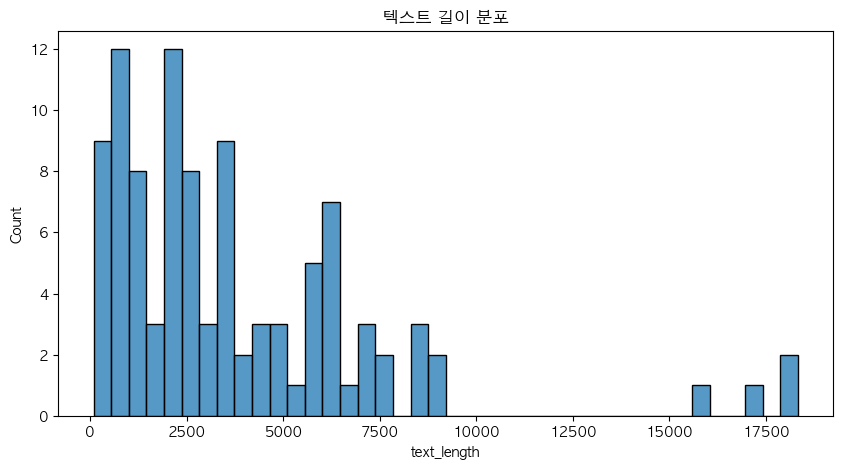

In [10]:
# ===============================================================
# 3. 텍스트 길이 기반 분석
# ===============================================================

df["text_length"] = df["텍스트"].astype(str).apply(len)

print(df["text_length"].describe())

plt.figure(figsize=(10,5))
sns.histplot(df["text_length"], bins=40)
plt.title("텍스트 길이 분포")
plt.show()


In [11]:
# ===============================================================
# 4. 파일 형식(hwp/pdf) 분포
# ===============================================================

df["파일형식"].value_counts()


파일형식
hwp    96
pdf     4
Name: count, dtype: int64

In [12]:
# ===============================================================
# 5. 예산(사업 금액) 숫자 변환 시도
# ===============================================================

# => 억 / 만 등 단위가 섞여 있을 가능성 있음
# => 여기서는 단순 숫자 추출 버전(정교한 버전은 shared/utils로 이동 예정)

def extract_budget(x):
    if pd.isnull(x):
        return np.nan
    numbers = ''.join(ch for ch in str(x) if ch.isdigit())
    return int(numbers) if numbers else np.nan

df["예산_numeric"] = df["사업 금액"].apply(extract_budget)
df[["사업 금액", "예산_numeric"]].head()


,사업 금액,예산_numeric
0,130000000.0,1.300000e+09
1,129300000.0,1.293000e+09
2,40000000.0,4.000000e+08
3,150000000.0,1.500000e+09
4,900000000.0,9.000000e+09


In [13]:
# ===============================================================
# 6. 발주 기관 확인
# ===============================================================

df["발주 기관"].value_counts().head(50)


발주 기관
한국철도공사 (용역)          3
한국수자원공사              3
국방과학연구소              2
축산물품질평가원             2
광주과학기술원              2
국민연금공단               2
한국농어촌공사              2
수협중앙회                2
인천광역시                2
한국생산기술연구원            2
한국연구재단               2
경기도 안양시              1
국가철도공단               1
남서울대학교               1
한국지식재산보호원            1
재단법인 광주연구원           1
사단법인아시아물위원회사무국       1
한국교육과정평가원            1
국립중앙의료원              1
서울특별시 여성가족재단         1
국립인천해양박물관            1
파주도시관광공사             1
한국건강가정진흥원            1
한국로봇산업진흥원            1
케빈랩 주식회사             1
경기도 평택시              1
인천공항운영서비스(주)         1
한영대학                 1
한국산업인력공단             1
문화체육관광부 국립민속박물관      1
재단법인 광주광역시 광주문화재단    1
(재)예술경영지원센터          1
한국수자원조사기술원           1
대한적십자사 의료원           1
한국산업단지공단             1
그랜드코리아레저(주)          1
조선대학교                1
한국보육진흥원              1
한국수출입은행              1
한국원자력연구원             1
세종테크노파크              1
경기도사회서비스원            1
(사)벤처기업협회            1
재단법인 

In [14]:
# ===============================================================
# 8. 중복 문서 여부 확인 (공고 번호 기준)
# ===============================================================

dup = df["공고 번호"].duplicated().sum()
print("중복 문서 수:", dup)

df[df["공고 번호"].duplicated(keep=False)].sort_values("공고 번호").head()


중복 문서 수: 17


공고 번호  공고 차수                                    사업명         사업 금액  \
7    NaN    NaN                  차세대 포털·학사 정보시스템 구축사업   1.127000e+10   
12   NaN    NaN  [사전공개] 학업성취도 다차원 종단분석 통합시스템 1차 고도화 용역  0.000000e+00   
13   NaN    NaN          [입찰공고] 산학협력단 정보시스템 운영 용역업체 선정  0.000000e+00   
14   NaN    NaN                       건설통합시스템(CMS) 고도화  7.802300e+08   
15   NaN    NaN                         통합정보시스템 고도화 용역  1.400000e+08   

            발주 기관                공개 일자            입찰 참여 시작일  \
7           고려대학교  2024-07-01 00:00:00  2024-07-05 11:00:00   
12        서울시립대학교  2023-06-20 00:00:00                  NaN   
13          경희대학교  2024-05-02 00:00:00                  NaN   
14        한국수자원공사  2024-05-31 00:00:00                  NaN   
15  국가과학기술지식정보서비스  2024-05-30 00:00:00  2024-05-30 00:00:00   

              입찰 참여 마감일  \
7   2024-08-12 11:00:00   
12                  NaN   
13                  NaN   
14                  NaN   
15  2024-06-11 00:00:00   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       사업 요약  \
7                                                                                                                                                                                                                                                                  - 사업개요: 고려대학교 차세대 포털·학사 정보시스템 구축 사업\n- 추진배경: 학령인구 감소, 교육환경 변화 등으로 대학은 급격한 사회·기술변화에 직면하고 있음\n- 사업범위: 분산된 시스템 및 데이터의 통합, 데이터 기반 대학경영 지원 개선, 사용자 정보서비스 접근성 개선\n- 기대효과: 교육 환경 대응, 시스템 통합, 대학경영 개선, 정보서비스 접근성 개선, 대학 경쟁력 강화\n- 추진목표: 차세대 구축을 통해 정보서비스 품질 강화 및 대학 교육 시스템 경쟁력 확보   
12                                                                                                                                                                                                                                                                                                                                        - 사업개요: 학업성취도 다차원 종단분석 통합시스템 1차 고도화\n- 추진배경: 서울시립대학교에서 학업성취도 평가를 효과적으로 수행하기 위해\n- 사업범위: 종단분석 통합시스템의 고도화를 통한 학업성취도 평가 기능 개선\n- 기대효과: 정확한 학생 성취도 평가 및 개인 맞춤형 교육 지원 가능\n- 추진목표: 학업성취도 평가의 정확성과 효율성 향상   
13                                                                                                                                                                                                                                                                           - 사업명: 경희대학교 산학협력단 정보시스템 운영 용역사업\n- 추진배경: 정보시스템 운영 효율화 및 안정적인 서비스 제공을 위한 최적상태 유지\n- 사업범위: 정보시스템 운영 및 유지관리, 내/외부 연계시스템 운영/유지관리, 정보시스템 개발/운영 관련 제반 업무\n- 기대효과: 사용자 편의성 향상, 신속한 요구사항 처리 및 시스템 반영, 연계시스템 관련 지원 및 개발 등\n- 추진목표: 최적의 운영상태 유지, 서비스 연속성 향상, 사업의 성공적인 수행   
14                                                                                                                                                                                   - 사업개요: 건설통합시스템(CMS) 고도화 사업으로, 위원회 및 건설사업관리용역에 대한 기능 구축과 개선이 목표입니다.\n- 추진배경: 위원회와 건설사업관리에 대한 효율성 및 편의성을 높이기 위해 CMS를 고도화하고자 하는 필요성이 있습니다.\n- 사업범위: 위원회 기능 개선, 건설사업관리용역 기능 개선 등을 포함한 CMS의 고도화 작업이 수행됩니다.\n- 기대효과: 위원회 및 건설사업관리용역에 대한 효율성과 정확성이 향상되며, 업무 수행에 대한 편의성이 증가할 것으로 기대됩니다.\n- 추진목표: CMS를 고도화하여 위원회 및 건설사업관리용역에 대한 효율적이고 원활한 업무 수행을 지원하는 것이 목표입니다.   
15  - 사업 개요: 통합정보시스템 고도화 용역, 사업기간 5개월 이내, 추정가격 140,000,000원 이내, 협상에 의한 계약\n- 사업추진 방안: 기존 시스템과의 연계를 고려한 신규 시스템 설계, 자료 표준화 및 체계화, 사용자 편의성 고려한 UI/UX 시스템 구현, 기존 시스템 및 인프라 활용한 운영환경 구성\n- 사업 범위: 기관생명윤리, 동물실험윤리, 국가연구개발사업 연구비 사용기준 준수, 연구계획 관리, 전자결재서식 연동, 기능개선(연구노트 관리)\n- 추진 체계: 추진조직 구성(사업추진 총괄, 사업추진 전담, 사업 수행팀)\n- 목표시스템 구성도: 사업 범위에 대한 시스템 구성도\n- 추진 일정: 사업 시작 후 5개월간의 일정\n- 공공 SW 사업 법제도 점검항목별 적용

In [18]:
# ===============================================================
# 9. EDA 결과 요약 리포트 생성
# ===============================================================

summary = {
    "전체 문서 수": df.shape[0],
    "결측치 많은 컬럼": missing_summary.head(5).to_dict(),
    "텍스트 평균 길이": df["text_length"].mean(),
    "텍스트 최소/최대 길이": (df["text_length"].min(), df["text_length"].max()),
    "파일 형식 분포": df["파일형식"].value_counts().to_dict(),
    "예산 숫자 변환 가능 비율": df["예산_numeric"].notnull().mean(),
    "발주 기관 개수": df["발주 기관"].nunique(),
    "공고번호 중복 개수(실제 중복은 없고 NaN이 중복으로 보인 것)": dup
}

summary


{'전체 문서 수': 100,
 '결측치 많은 컬럼': {'입찰 참여 시작일': 26,
  '공고 번호': 18,
  '공고 차수': 18,
  '입찰 참여 마감일': 8,
  '사업 금액': 1},
 '텍스트 평균 길이': np.float64(3843.53),
 '텍스트 최소/최대 길이': (89, 18335),
 '파일 형식 분포': {'hwp': 96, 'pdf': 4},
 '예산 숫자 변환 가능 비율': np.float64(0.99),
 '발주 기관 개수': 87,
 '공고번호 중복 개수(실제 중복은 없고 NaN이 중복으로 보인 것)': np.int64(17)}

# hwp 로드

In [15]:
!apt-get install -y git build-essential
!pip install pyhwp

/bin/bash: apt-get: command not found
  Preparing metadata (setup.py) ... done
  DEPRECATION: Building 'pyhwp' using the legacy setup.py bdist_wheel mechanism, which will be removed in a future version. pip 25.3 will enforce this behaviour change. A possible replacement is to use the standardized build interface by setting the `--use-pep517` option, (possibly combined with `--no-build-isolation`), or adding a `pyproject.toml` file to the source tree of 'pyhwp'. Discussion can be found at https://github.com/pypa/pip/issues/6334
  Created wheel for pyhwp: filename=pyhwp-0.1b15-py3-none-any.whl size=315454 sha256=73b6b12b693e4fb14444a77b57f694eefb8a60b2c9e3cb1721dc454ef36a1d02
  Stored in directory: /Users/apple/Library/Caches/pip/wheels/1b/ca/e5/649fa54b58f43402dec61156e1af1a852bd7890fcd73db79c8
Successfully built pyhwp
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2/2 [pyhwp]

[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: pip install --upgrade pip


In [17]:
!pip install pyhwp


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: pip install --upgrade pip


In [19]:
import pyhwp

def extract_hwp_text(path):
    doc = pyhwp.HWPDocument(path)
    text = []

    for sec in doc.bodytext.section_list:
        for p in sec.paragraph_list:
            text.append(p.text)

    return "\n".join(text)

# HWP 파일에서 텍스트 추출 테스트
file_path = os.path.join(ROOT_PATH, "data/raw/")

text = extract_hwp_text("/content/sample.hwp")
print(text[:500])


ModuleNotFoundError: No module named 'pyhwp'